# Proof stage analysis

Analyze the commands and other facets of the proof data to see if there is any temporality we can use.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
from pathlib import Path

from coprover import PROJ_ROOT

In [2]:
CMD1_PREFIX = "command1: "

SRC_TXT = "source_text"
CMD = "command"
CMD_HIST = "command_hist"
PERC = "percentage"
TGT_TXT = "target_text"
PAD_TOK = " <pad> "

TSV_FPATH = Path("tags_proofstep_cmdN=3.tsv")
full_df = pd.read_csv(TSV_FPATH, sep="\t",
                      names=[SRC_TXT, CMD, CMD_HIST, PERC])
full_df

,source_text,command,command_hist,percentage
0,<ANT> <CONS> s-formula forall ['variable'] ['v...,subtype-tcc,"NOOP,NOOP,NOOP",1.000
1,<ANT> <CONS> s-formula forall ['variable'] ['v...,skosimp*,"NOOP,NOOP,NOOP",0.333
2,<ANT> <CONS> s-formula apply constant type-act...,apply-extensionality,"NOOP,NOOP,skosimp*",0.667
3,<ANT> <CONS> s-formula apply constant type-act...,grind,"NOOP,skosimp*,apply-extensionality",1.000
4,<ANT> <CONS> s-formula forall ['variable'] ['v...,subtype-tcc,"NOOP,NOOP,NOOP",1.000
...,...,...,...,...
16060,<ANT> <CONS> s-formula apply constant apply co...,use,"NOOP,skosimp*,lemma",0.500
16061,<ANT> s-formula apply constant apply constant ...,flatten-disjunct,"skosimp*,lemma,use",0.667
16062,<ANT> s-formula apply constant apply constant ...,flatten,"lemma,use,flatten-disjunct",0.833
16063,<ANT> s-formula apply constant apply constant ...,ground,"use,flatten-disjunct,flatten",1.000


In [3]:
full_df[SRC_TXT] = CMD1_PREFIX + full_df[SRC_TXT] + PAD_TOK + full_df[CMD] + PAD_TOK + full_df[CMD_HIST]
full_df.iloc[0][SRC_TXT]

"command1: <ANT> <CONS> s-formula forall ['variable'] ['variable'] ['variable'] apply getfield ['variable'] apply getfield ['variable'] ['variable'] <HID>  <pad> subtype-tcc <pad> NOOP,NOOP,NOOP"

In [4]:
print(full_df[PERC].min(), full_df[PERC].max())

0.002 1.0


In [31]:
# Create subset where target command is active
def cmdpos_analysis(tgt_cmd):
    filtered_df = full_df[full_df[CMD] == tgt_cmd]
    tgt_perc = filtered_df[PERC]
    plt.clf()
    fig,ax = plt.subplots(1, figsize=(12,6))
    ax.hist(np.array(tgt_perc), bins=20)
    plt.title("Command {} usage by % in all proof steps".format(tgt_cmd))
    display(plt.show())

In [137]:
# Create subset where target command is active
tgt_cmd = "skosimp*"
def cmdpos_analysis(tgt_cmd):
    num_samples=10
    NUM_BINS = 10
    sample_frac = 0.5

    filtered_df = full_df[full_df[CMD] == tgt_cmd]
    full_count, _ = np.histogram(filtered_df[PERC], bins=NUM_BINS)  
    count_accum = []
    for _ in range(num_samples):
        sampled_df = filtered_df.sample(frac=sample_frac, replace=True)
        tgt_perc = sampled_df[PERC]
        count, division = np.histogram(tgt_perc, bins=NUM_BINS)
        count_accum.append(count)
    count_accum = np.array(count_accum)
    maxes = np.max(count_accum, 0) * 1 / sample_frac
    mins = np.min(count_accum, 0) * 1 / sample_frac
    stds = np.std(count_accum, 0) * 1 / sample_frac

    plt.clf()
    fig,ax = plt.subplots(1, figsize=(9,6))
    x = np.arange(NUM_BINS)
    ax.bar(x, full_count, color='grey', yerr=stds, alpha=0.5, error_kw=dict(capsize=5), label='counts')
    ax.plot(x, maxes, color='blue', label='max')
    ax.plot(x, mins, color='red', label='min')
    ax.set_xlabel("% Proof Complete")
    plt.xticks(ticks=x, labels=["{}-{}".format(10 * i, 10*(i+1)) for i in x])
    ax.set_ylabel("Count")
    plt.title("{}, count by % of proof".format(tgt_cmd))
    plt.legend()
    display(plt.show())

<Figure size 432x288 with 0 Axes>

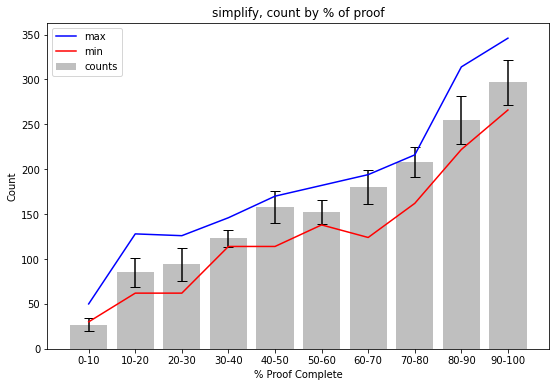

None

<Figure size 432x288 with 0 Axes>

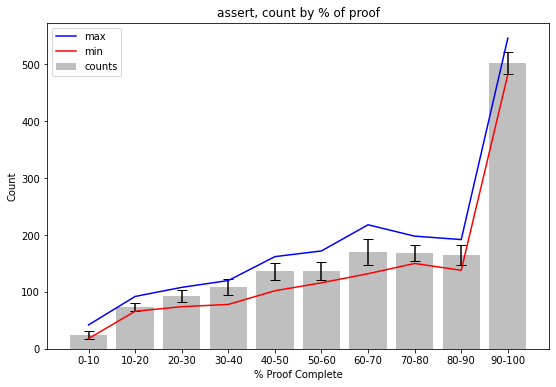

None

<Figure size 432x288 with 0 Axes>

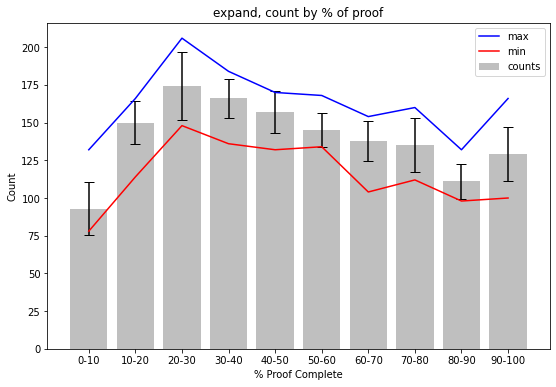

None

<Figure size 432x288 with 0 Axes>

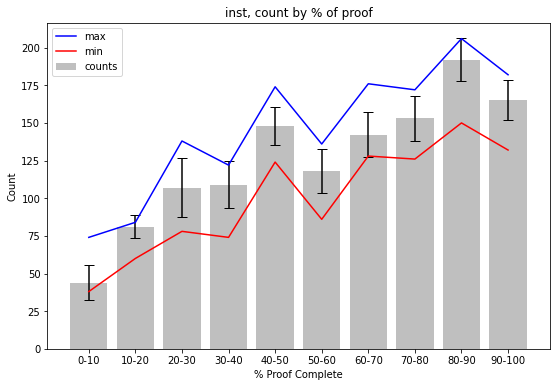

None

<Figure size 432x288 with 0 Axes>

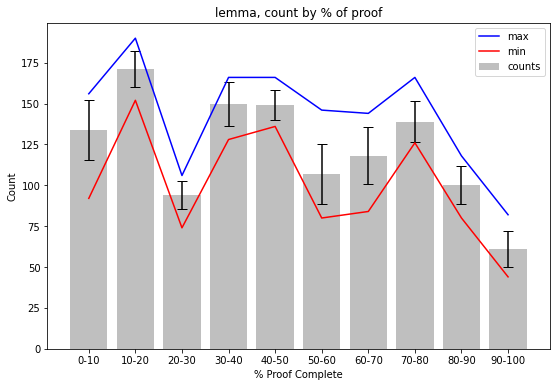

None

<Figure size 432x288 with 0 Axes>

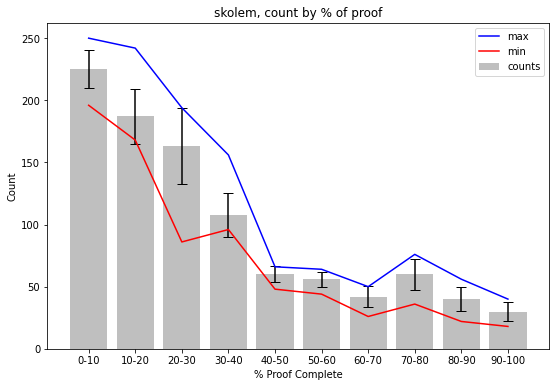

None

<Figure size 432x288 with 0 Axes>

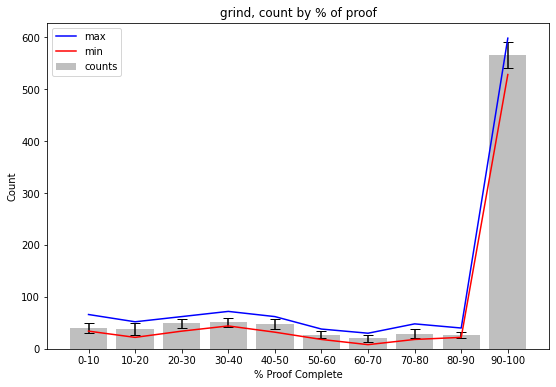

None

In [138]:
HIFREQ_CMDS = ['simplify', 'assert', 'expand', 'inst', 'lemma', 'skolem', 'grind']

for cmd in HIFREQ_CMDS:
    cmdpos_analysis(cmd)

<Figure size 432x288 with 0 Axes>

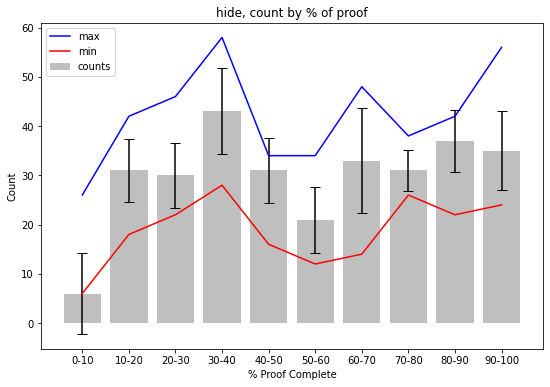

None

<Figure size 432x288 with 0 Axes>

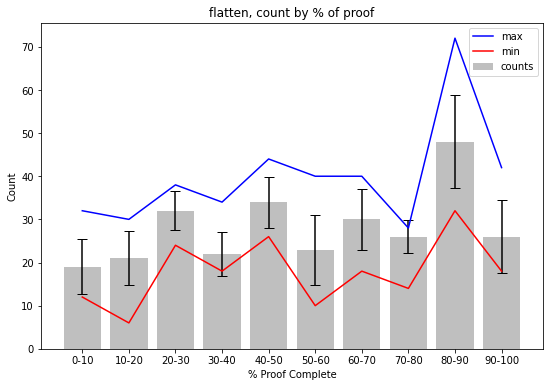

None

<Figure size 432x288 with 0 Axes>

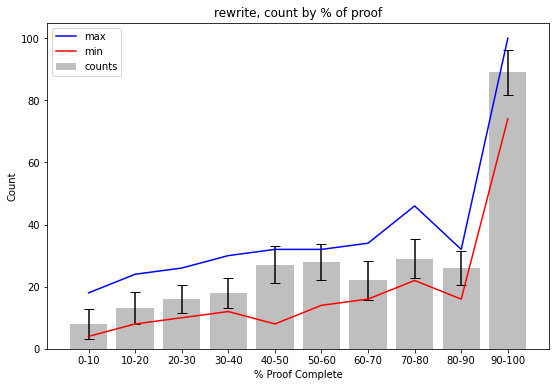

None

<Figure size 432x288 with 0 Axes>

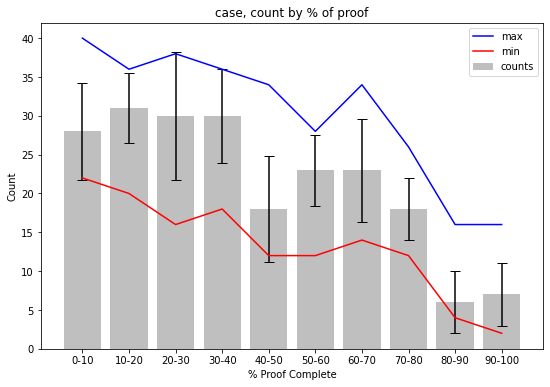

None

<Figure size 432x288 with 0 Axes>

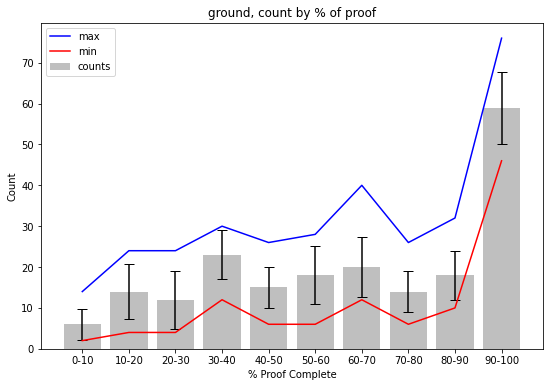

None

In [140]:
MIDFREQ_CMDS = ['hide', 'flatten', 'rewrite', 'case', 'ground']

for cmd in MIDFREQ_CMDS:
    cmdpos_analysis(cmd)

<Figure size 432x288 with 0 Axes>

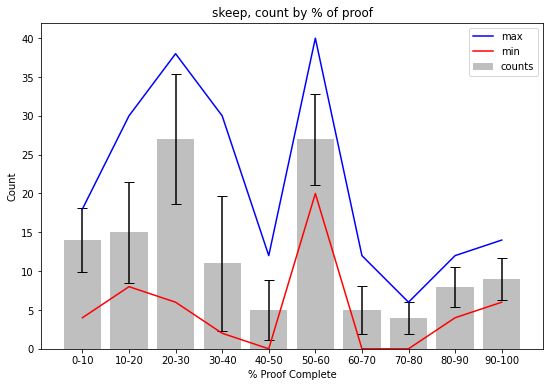

None

<Figure size 432x288 with 0 Axes>

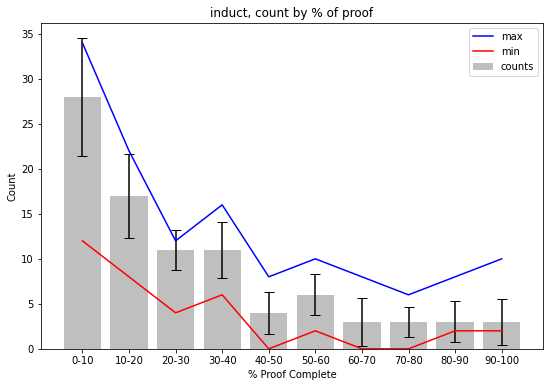

None

<Figure size 432x288 with 0 Axes>

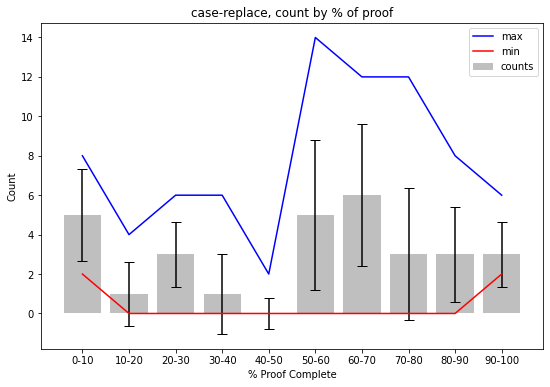

None

In [139]:
LOFREQ_CMDS = ['skeep', 'induct', 'case-replace']

for cmd in LOFREQ_CMDS:
    cmdpos_analysis(cmd)